In the mini project below we will analyze customers' operations on platforms, answering the questions like: what types of clients are top-customers, what platform is used more than others etc.
Some diagrams will help us to understand the results more clearly.

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [165]:
path = '/Users/alinarunaeva/Projects_Python/Operations/3_user_data.csv' #set the data path od file to use

In [166]:
users = pd.read_csv(path) #read the file

In [167]:
users.head() #show first 5 rows in file

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [168]:
users.describe() #show data statistics for each column

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [169]:
users.isna().sum() #count the number of empty fields

client     0
premium    0
age        0
dtype: int64

In [170]:
users.shape #show the number of rows and columns in df

(2954, 3)

In [171]:
path_logs = ('/Users/alinarunaeva/Projects_Python/Operations/3_logs.csv')

In [172]:
logs = pd.read_csv(path_logs)

In [173]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [174]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [175]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09



What customer made max amount of operations?(success == True)

In [176]:
best_customer = logs.query('success == True')\
.groupby('client', as_index = False)\
.agg({"platform":"count"})\
.sort_values(by = 'platform')\
.rename(columns={"platform":"qty"})

In [177]:
best_customer # several customers have same results

,client,qty
0,40,1
1882,65936,1
1883,66064,1
1884,66245,1
1885,66266,1
...,...,...
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41


In [178]:
best_clients = best_customer.qty.max() #select only max value from qty column

In [179]:
list_best_clients = best_customer.query('qty == @best_clients') # Select values from best_customer same as max value
list_best_clients

,client,qty
332,12179,41
2231,78349,41
1758,61468,41
2345,82563,41
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41
1759,61473,41


С какой платформы осуществляется наибольшее количество успешных операций?
Which platform has the highest number of successful transactions?

In [180]:
best_platform = logs.query('success == True').groupby('platform', as_index = False)\
.agg({"success":"count"})\
.sort_values(by = 'success', ascending = False)\
.rename(columns={"success":"qty"})

In [181]:
best_platform 

,platform,qty
1,phone,2019
0,computer,1090
2,tablet,180


Какую платформу предпочитают премиумные клиенты?
Which platform do premium customers prefer?

In [182]:
ttl = users.merge(logs, on = 'client', how = 'inner')

In [183]:
ttl.shape

(3439, 6)

In [184]:
ttl.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [185]:
ttl.info() # show number of rows, data type of df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 3438
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    3439 non-null   int64 
 1   premium   3439 non-null   bool  
 2   age       3439 non-null   int64 
 3   success   3439 non-null   bool  
 4   platform  3439 non-null   object
 5   time      3439 non-null   int64 
dtypes: bool(2), int64(3), object(1)
memory usage: 141.1+ KB


In [186]:
ttl_prem = ttl.query('premium == True')\
.groupby(['platform'], as_index = False)\
.agg({"client":"count"})\
.sort_values(by = 'client', ascending = False)\
.rename(columns={"client":"qty"})

In [187]:
ttl_prem # premium clients prefer phone

,platform,qty
1,phone,246
0,computer,150
2,tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Visualize the age distribution of customers depending on the type of customer (premium or not)

In [188]:
ttl_age = ttl.groupby(['premium', 'age'], as_index = False)/ #  let's group df by status and age before vizualization
.agg({"client":"count"})\
.rename(columns={"client":"qty"})
ttl_age

SyntaxError: invalid syntax (<ipython-input-188-9033885b0b02>, line 1)

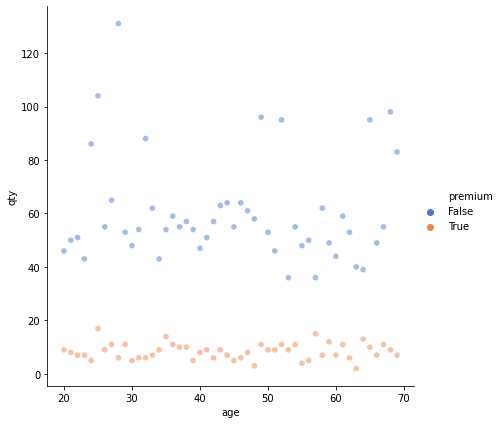

In [189]:
sns.relplot(x="age", y="qty", hue= 'premium',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=ttl_age)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

Visualize the number of successful operations made on the computer platform as a function of age using sns.countplot (x is age, y is the number of successful operations). What age group of clients had the highest number of successful actions?

In [214]:
ttl_scs = ttl.query('platform == "computer" & success == True')

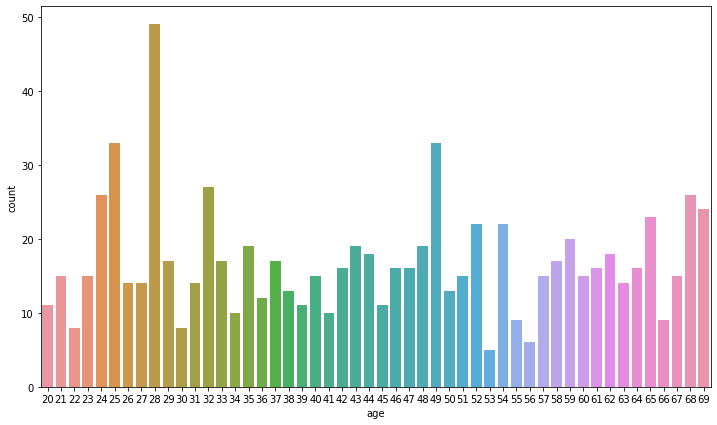

In [223]:
ax = plt.subplots(figsize = (12,7))
sns.countplot(data = ttl_scs, x='age')

28 y.o. clients on computer platform are top - clients